<a href="https://colab.research.google.com/github/alexDahersh/Data-Science-fund./blob/main/Copy_of_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how much time you'll spend studying on a given day, using the amount of sleep you got the night before as a predictor.

If this seems to easy, then add another variable or two (test tomorrow? activity after school?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

ok

**Task2**:

What is a decision tree? How do they work?

A decision tree is a tree which splits into multiple cases at every node,splitting the data into multiple sections. For example, the top node could split in two at x = 100. The left node would be x<=100 and right would be x>100. These nodes could then further split the data. Each node would have a certain amount of data in its area, and have a mean for the data. The prediction using the tree would be to go to the bottom of the tree where the data fits and getting the mean.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The depth of a tree is how many layers down it goes. Too many layers will over fit the data and too few layers won't give good predictions. You can look at a graph of a tree to roughly predict if it has too many layers or not. If the tree seems to be following trends of some random outliers, its probably overfitting. If the line is way off the points somewhere it is underfitting.

**Task4:**

How are BART models similar and different from a decision tree?

Bart models are a lot of decisions trees combined together. Each decision tree will be a little different and pick up on different trends in the data, so combining all the trees together should pick up trends in the data.

BART models are similar to decision trees because they use decision trees, and different because they don't just use the simple prediction of one decision tree. This lets them be more complex without overfitting to data.

**Task5**:

Why would we use a BART model instead of a decision tree?

Because a decision tree by itself is too simple. A BART model can use multiple decision trees to pick up on trends in the data while one decision tree can barely pick up a few trends. We'd want to use a BART model because we want our prediction to not be just a few flat lines at random places.

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

In [2]:
!pip install pymc-bart
import pymc_bart as pmb
#!pip install preliz

In [3]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

In [4]:
penguins

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


(array([ 3., 11., 13., 29., 31., 38., 35., 17., 24., 17., 18., 21., 15.,
        12., 10., 17., 11.,  5.,  5.,  1.]),
 array([2.7 , 2.88, 3.06, 3.24, 3.42, 3.6 , 3.78, 3.96, 4.14, 4.32, 4.5 ,
        4.68, 4.86, 5.04, 5.22, 5.4 , 5.58, 5.76, 5.94, 6.12, 6.3 ]),
 <BarContainer object of 20 artists>)

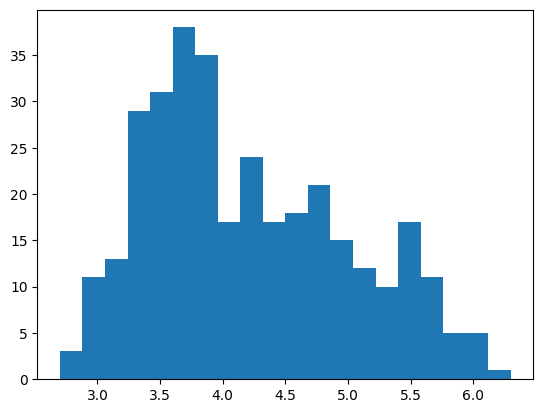

In [5]:
plt.hist(penguins.body_mass,bins = 20)

In [4]:
y = penguins.body_mass;
predictors = ['flipper_length', 'bill_depth', 'bill_length']

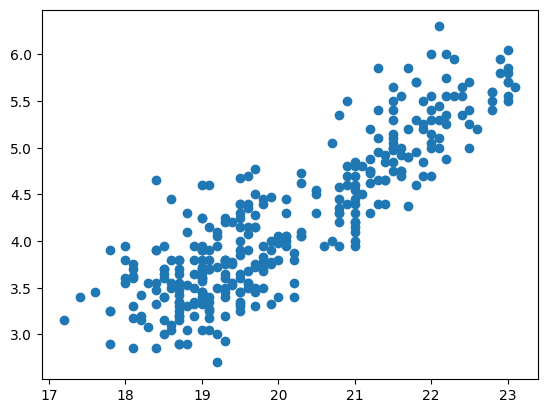

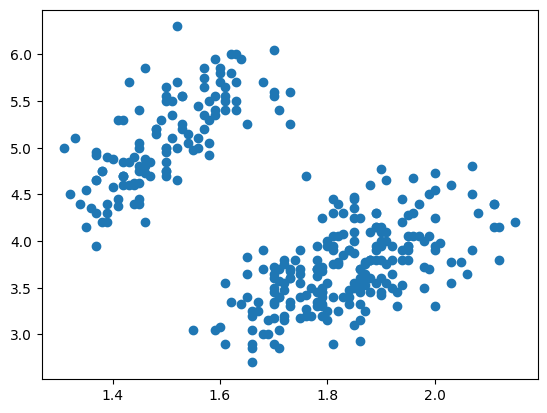

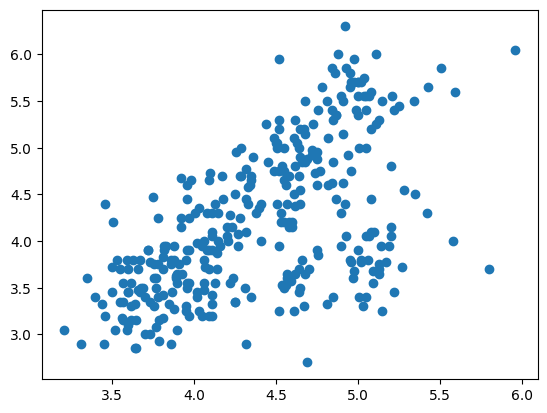

In [7]:
for predictor in predictors:
  fig, ax = plt.subplots()
  ax.scatter(penguins[predictor],y)

In [5]:
X = penguins[predictors].to_numpy()
Y = y.to_numpy()

In [6]:
with pm.Model() as model_penguins:
    s = pm.HalfNormal('s',20) #sigma = 20 is a blind guess
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50) #log around Y
    μ = pm.Deterministic("μ",pm.math.exp(μ_)) #exp it all once BART is done
    y = pm.Gamma("y", mu=μ, sigma=s,  observed=Y) #likelihood
    idata_penguins = pm.sample(compute_convergence_checks=False)

Output()

In [7]:
pm.sample_posterior_predictive(idata_penguins,model_penguins, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

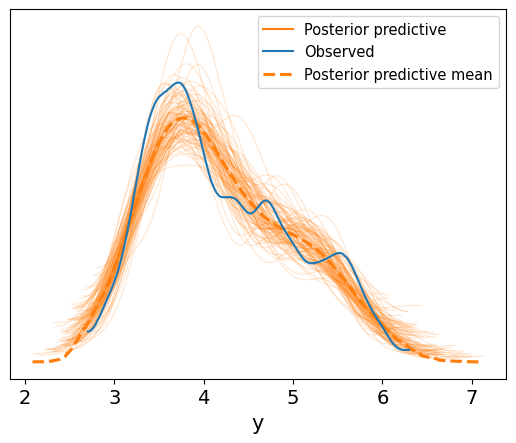

In [8]:
ax = az.plot_ppc(idata_penguins, num_pp_samples=100, colors=["C1", "C0", "C1"])
#ax.set_xlim(0.0,0.0005)

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

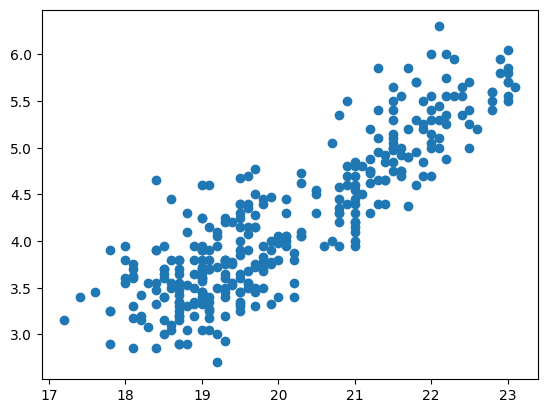

In [9]:
plt.scatter(penguins.flipper_length,penguins.body_mass)


In [10]:
posterior_mean = idata_penguins.posterior["μ"]

μ_hdi = az.hdi(ary=idata_penguins, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_penguins, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


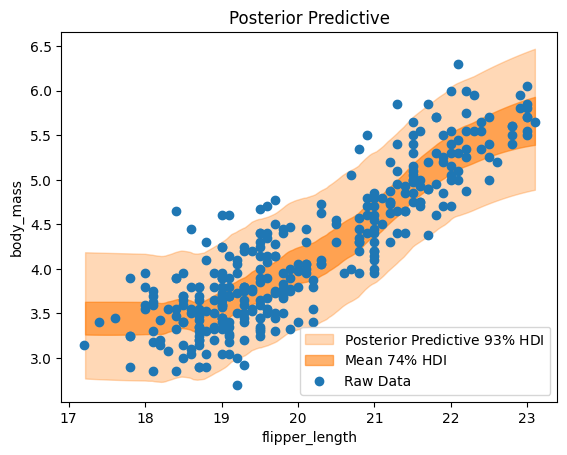

In [11]:
idx = np.argsort(penguins["flipper_length"])
fig, ax = plt.subplots()

az.plot_hdi(
    x=penguins["flipper_length"],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=penguins["flipper_length"],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(penguins["flipper_length"], penguins["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

It looks like the plot captures the association between flipper length and body mass. The mean HDI seems to be in the center of the dots and the HDI seems to encompass most of the dots. There is enough data that the model doesn't seem to be overfitting this specific relationship. The model may fail at the end though.

Penguins with bigger flippers would probably be bigger overall and have more body mass so the increase makes sense in context. There seems to be two groups of points which could be different genders. The BART model seems to identify the differences in these penguins and adjusts its predictions for each.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>],
      dtype=object)

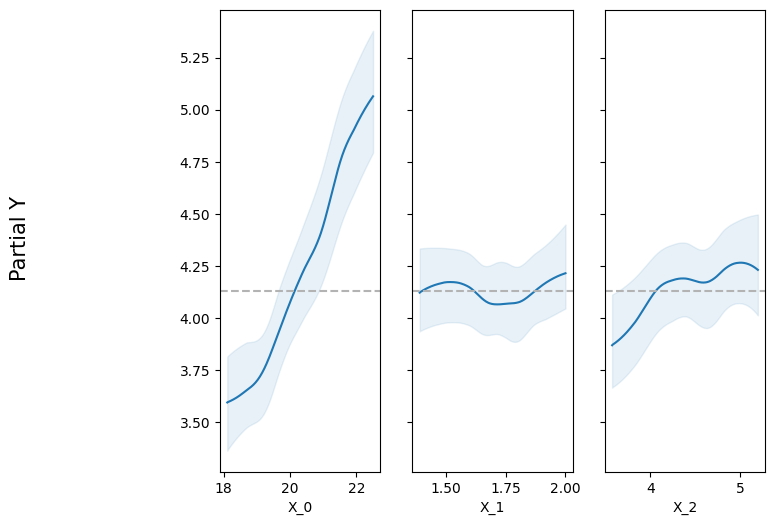

In [12]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>],
      dtype=object)

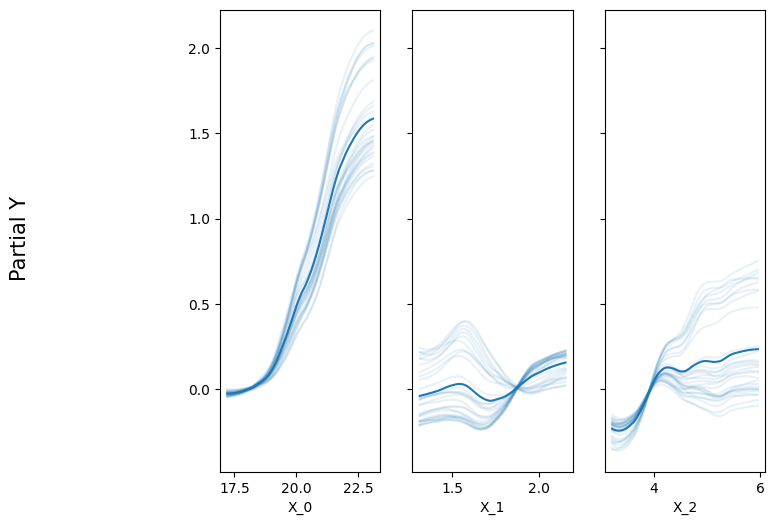

In [13]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

In [14]:
vi_counties = pmb.compute_variable_importance(idata_penguins, μ_, X)

<Axes: ylabel='R²'>

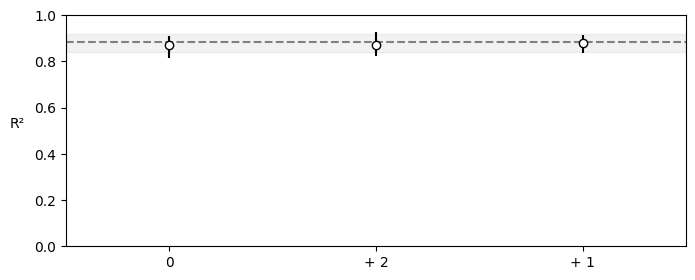

In [15]:
pmb.plot_variable_importance(vi_counties)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

Flipper length is the most important variable for predicting body mass. There is no significant increase in the accuracy of the model when more variables are added to a model with just flipper length as can be seen by the similar R^2 values. Flipper length predicts body mass about as good as flipper length, bill depth, and bill length. Flipper length is also the only variable which by itself can predict values above 4.5 and below 3.75

The ice plot shows the relationship for each variable to body mass when taking the other variables into account. Flipper length still increases with body mass, but the amount of increase depends on other variables. For low values of flipper length, the other variables dont't matter (shown by all the lines being at the smae spot), but for higher values of flipper length the other variables determine just how much body mass increased from lower values of flipper length.

Bill depth seems to reflect over the x-axis for different values of the other variables. In some instances lower bill depths mean lower body mass than average and higher bill depths mean greater body mass. In some instances lower bill depths mean high body mass and higher bill depths mean lower body mass. The extent of deviation from the average also seems to depend on the other variables.

Bill length seems to take two paths in relation to the other variables. Sometimes body mass increases as bill length goes above 4, and sometimes it decreases. Before a bill length of 4, most observations are at about the same body mass regardless of what the other variables are. The magnitude of the slope right after a bill length of 4 also seems to differ with the other variables.

The relationship is complicated by other variables. There seems to be two groups (which are dependent on other variables) for bill length and bill depth. These two groups are likely the two groups that appear in the other plots of the data. These two groups differ wildy in their predictions based on bill length or bill depth. Flipper length seems less dependent on bill length and bill depth, but the slope of change between flipper length and body mass does depend a bit on bill length and bill depth, as can be seen by the lines with varying slopes in the ice plot.